# Training and Evaluating Neural Network Model

In this notebook, we crafted and trained a neural network model to discern patterns among various cell stages. The model underwent training and testing using an 80/20 split of data. Training encompassed 25 epochs with a batch size of 35. Post-training, we visualized the model's performance, revealing a struggle to generalize cellular states effectively.

The model was saved within this module, which later be used for the `cell_states_identifier.py` script for identifying cellular stages from other datasets.

In [1]:
import pathlib
import sys

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

from src import analysis_utils

sys.path.append("../../")

2024-05-10 09:22:46.038885: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 09:22:46.038935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 09:22:46.040141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-10 09:22:46.047342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 09:22:46.969510: W tensorflow/compiler/tf2

In [2]:
# notebook parameters
seed = 0

# setting up paths
data_dir = pathlib.Path("../../data").resolve(strict=True)
mitocheck_data_path = (data_dir / "raw/mitocheck_data/normalized_data").resolve(
    strict=True
)

# adding to the processed data folder
data_split_dir = (data_dir / "processed/split/").resolve(strict=True)

In [3]:
# Load the datasets from Parquet files

# features
X_train = pd.read_parquet(data_split_dir / "X_train.parquet")
X_test = pd.read_parquet(data_split_dir / "X_test.parquet")
X_val = pd.read_parquet(data_split_dir / "X_val.parquet")

# labels
y_train = pd.read_parquet(data_split_dir / "y_train.parquet")[
    "Mitocheck_Phenotypic_Class"
]
y_test = pd.read_parquet(data_split_dir / "y_test.parquet")[
    "Mitocheck_Phenotypic_Class"
]
y_val = pd.read_parquet(data_split_dir / "y_val.parquet")["Mitocheck_Phenotypic_Class"]

In [4]:
# Ensure GPU support
physical_devices = tf.config.list_physical_devices("GPU")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Define the model creation function


def create_model(input_shape, num_classes):
    model = models.Sequential(
        [
            layers.Dense(512, activation="relu", input_shape=(input_shape,)),
            layers.Dropout(0.5),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

In [6]:
# Define the input shape (number of features) and number of classes
input_shape = X_train.shape[1]
num_classes = len(y_train.unique())

In [7]:
# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

2024-05-10 09:22:48.771953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1387 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6


In [8]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val)
)

Epoch 1/25


2024-05-10 09:22:50.203776: I external/local_xla/xla/service/service.cc:168] XLA service 0x798ab07957d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-10 09:22:50.203813: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-10 09:22:50.214077: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-10 09:22:50.245226: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1715354570.343602  266935 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


73/73 [==============================] - 2s 6ms/step - loss: 2.1609 - accuracy: 0.4398 - val_loss: 1.0401 - val_accuracy: 0.6678
Epoch 2/25
73/73 [==============================] - 0s 4ms/step - loss: 1.2164 - accuracy: 0.6187 - val_loss: 0.8199 - val_accuracy: 0.7509
Epoch 3/25
73/73 [==============================] - 0s 4ms/step - loss: 0.9846 - accuracy: 0.6794 - val_loss: 0.7380 - val_accuracy: 0.7439
Epoch 4/25
73/73 [==============================] - 0s 4ms/step - loss: 0.8718 - accuracy: 0.7175 - val_loss: 0.6368 - val_accuracy: 0.7924
Epoch 5/25
73/73 [==============================] - 0s 4ms/step - loss: 0.7156 - accuracy: 0.7786 - val_loss: 0.6189 - val_accuracy: 0.8062
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.7838 - val_loss: 0.6182 - val_accuracy: 0.7889
Epoch 7/25
73/73 [==============================] - 0s 4ms/step - loss: 0.5922 - accuracy: 0.8089 - val_loss: 0.5645 - val_accuracy: 0.8339
Epoch 8/25
73/73 [=============

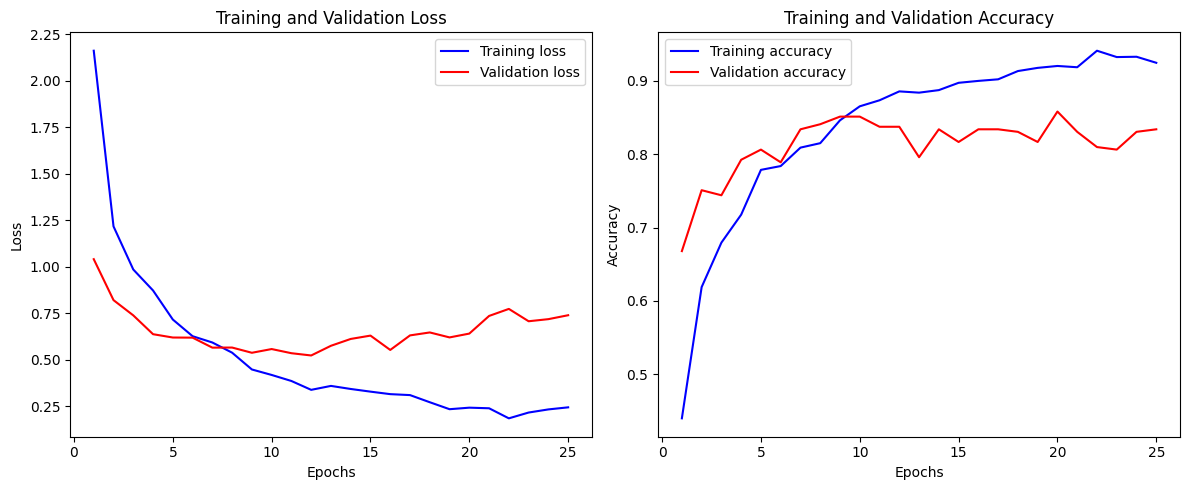

In [9]:
# ploting loss and accuracy
analysis_utils.plot_history(history)

In [10]:
model.save("./cell_state_identifier.keras")